In [3]:
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lz=WordNetLemmatizer()
nltk.download('stopwords')
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adam

In [6]:
voc_size=10000

In [7]:
news_df=pd.read_csv('/content/drive/MyDrive/processed.csv')

In [9]:
import seaborn as sns

In [11]:
X=news_df['content']
y=news_df['label']

In [12]:
X.head()

0    istanbul explosion isi bomber kill least istan...
1    trump give remark healthcare pm gmt white hous...
2    mi school sends welcome back packet warning ki...
3    spacex bfr go city city earth hour spacex bfr ...
4    republican lack agreement obamacare ahead trum...
Name: content, dtype: object

In [14]:
type(X)

pandas.core.series.Series

In [15]:
print(X)

0        istanbul explosion isi bomber kill least istan...
1        trump give remark healthcare pm gmt white hous...
2        mi school sends welcome back packet warning ki...
3        spacex bfr go city city earth hour spacex bfr ...
4        republican lack agreement obamacare ahead trum...
                               ...                        
55216    spain make largest cocaine bust year madrid re...
55217    breaking youre fired fbi director james comey ...
55218    wartorn darfur new u aid chief stress need hum...
55219    climate doubter pruitt take epa rein trump tar...
55220    need safe place pumpkin internet drag trump be...
Name: content, Length: 55221, dtype: object


In [16]:
len(X[0])

3657

In [17]:
corpus=[]
for i in range(0,len(X)):
  review=X[i]
  review=review.split()
  review=' '.join(review)
  corpus.append(review)


In [18]:
corpus[0]

'istanbul explosion isi bomber kill least istanbul cnn suicide bomber killed least foreigner tuesday popular central istanbul tourist area belonged isi official said attack show group nerve reach capacity terror group claimed responsibility blast yet turkish prime minister ahmet davutoglu pinned blame group call islamic state entrenched neighboring syria iraq proving willing time lash elsewhere least eight german died blast hagia sophia blue mosque tourist attraction istanbul cultural historic heart german chancellor angela merkel said warning figure may rise turkish official earlier told cnn least nine german killed davutoglu indicated wounded inside outside country german foreign minister frankwalter steinmeier saying nine german havent targeted died davutoglu said targeted whole turkey whole world born man responsible blast among thousand tracked turkish authority newly come turkey syria deputy prime minister numan kurtulmus said violence pinned many group including force loyal syri

In [19]:
onehot_repr=[one_hot(words,voc_size) for words in corpus]   #here voc_size denotes the number of columns


In [21]:
print(len(onehot_repr[0]))

510


In [22]:
 sent_length=1500
 embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
 #print(embedded_docs)
 from keras.layers import Dropout

In [45]:
embedding_vector_features=64
model1=Sequential()  #sequential model
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length,trainable=False))
#model.add(Dropout(0.7))
model1.add(Bidirectional(LSTM(64)))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))  #1 represents node which is simply a output node and since we are working on binary classification problem so sigmoid  #in model summary the dense parameter is 201 which says it has 201 biases
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
print(model1.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1500, 64)          640000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 706177 (2.69 MB)
Trainable params: 66177 (258.50 KB)
Non-trainable params: 640000 (2.44 MB)
_________________________________________________________________
None


In [25]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.2,random_state=42)


In [46]:
history1=model1.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=64)


Epoch 1/10
622/622 [==============================] - 58s 87ms/step - loss: 0.6490 - accuracy: 0.6165 - val_loss: 0.6474 - val_accuracy: 0.6743
Epoch 2/10
622/622 [==============================] - 54s 86ms/step - loss: 0.5892 - accuracy: 0.7174 - val_loss: 0.5642 - val_accuracy: 0.7519
Epoch 3/10
622/622 [==============================] - 53s 86ms/step - loss: 0.5848 - accuracy: 0.7111 - val_loss: 0.5580 - val_accuracy: 0.7483
Epoch 4/10
622/622 [==============================] - 56s 90ms/step - loss: 0.5486 - accuracy: 0.7381 - val_loss: 0.5480 - val_accuracy: 0.7456
Epoch 5/10
622/622 [==============================] - 53s 86ms/step - loss: 0.5761 - accuracy: 0.7426 - val_loss: 0.5143 - val_accuracy: 0.7680
Epoch 6/10
622/622 [==============================] - 53s 86ms/step - loss: 0.5830 - accuracy: 0.7069 - val_loss: 0.5744 - val_accuracy: 0.7214
Epoch 7/10
622/622 [==============================] - 53s 86ms/step - loss: 0.5365 - accuracy: 0.7543 - val_loss: 0.5059 - val_accuracy:

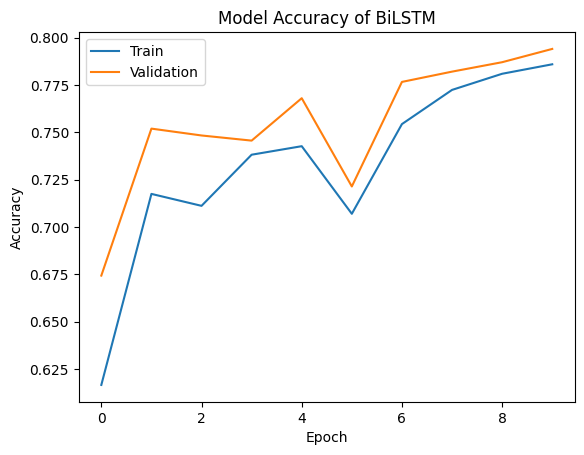

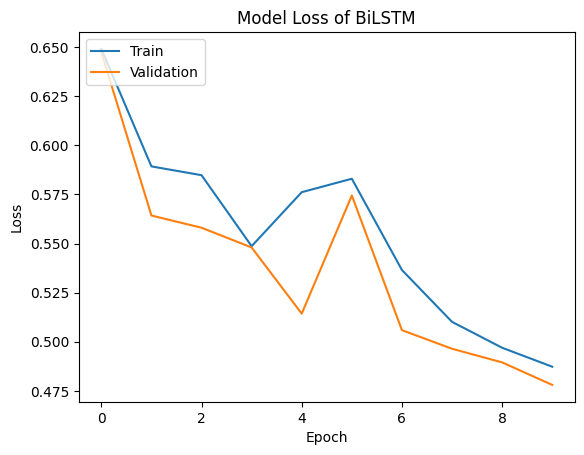

In [47]:
# Plot accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy of BiLSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss of BiLSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [50]:
model1.save('bilstm_model_try_1.h5')

In [49]:
y_pred = (model1.predict(X_test)>=0.5).astype(int)

346/346 [==============================] - 12s 34ms/step


In [51]:
from sklearn.metrics import classification_report, accuracy_score,ConfusionMatrixDisplay

In [52]:
accuracy_score(y_test, y_pred)

0.7919420552286103

In [53]:
#Print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81      5708
           1       0.83      0.72      0.77      5337

    accuracy                           0.79     11045
   macro avg       0.80      0.79      0.79     11045
weighted avg       0.80      0.79      0.79     11045



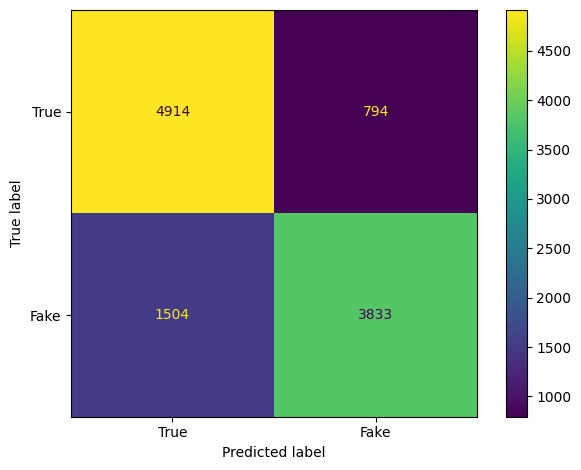

In [54]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =cm, display_labels =['True', 'Fake'])
cm_display.plot()
plt.tight_layout()
plt.show()